In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Dataset.csv')
df.head()

# LEVEL 1

## Task 1: Data Exploration and Preprocessing
- Explore the dataset and identify the number of rows and columns.
- Check for missing values in each column and handle them accordingly.
- Perform data type conversion if necessary.
- Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [ ]:
num_rows, num_cols = df.shape
print(f"Rows: {num_rows}, Columns: {num_cols}")

In [ ]:
missing_values = df.isnull().sum()
# print("Missing values per column:")
missing_values

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.show()

## Task 2: Descriptive Analysis
- Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.
- Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".
- Identify the top cuisines and cities with the highest number of restaurants.


In [ ]:
print(df['Aggregate rating'].value_counts())
print(df.describe())

In [ ]:
for cat_col in ['Country Code', 'City', 'Cuisines']:
    print(f"\nValue counts for {cat_col}:")
    print(df[cat_col].value_counts().head(10))

In [ ]:
print("\nTop cuisines:")
print(df['Cuisines'].value_counts().head(10))

print("\nTop cities:")
print(df['City'].value_counts().head(10))

## Task 3: Descriptive Analysis
- Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.
- Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".
- Identify the top cuisines and cities with the highest number of restaurants.

In [ ]:
# 1. Visualize restaurant locations on a map
import plotly.express as px

if 'Latitude' in df.columns and 'Longitude' in df.columns:
    fig = px.scatter_mapbox(
        df,
        lat='Latitude',
        lon='Longitude',
        color='Aggregate rating',
        hover_name='City',
        mapbox_style='open-street-map',
        title='Restaurant Locations by Aggregate Rating',
        height=500
    )
    fig.show()
else:
    print('Latitude and Longitude columns not found in the dataset.')

In [ ]:
# 2. Analyze distribution across cities/countries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Country Code', order=df['Country Code'].value_counts().index)
plt.title('Number of Restaurants by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().head(15).index
sns.countplot(data=df[df['City'].isin(top_cities)], x='City', order=top_cities)
plt.title('Number of Restaurants in Top 15 Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3. Correlation between location and rating
# Example: Correlation between latitude/longitude and aggregate rating
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    print('Correlation between Latitude and Aggregate rating:', df[['Latitude', 'Aggregate rating']].corr().iloc[0,1])
    print('Correlation between Longitude and Aggregate rating:', df[['Longitude', 'Aggregate rating']].corr().iloc[0,1])
else:
    print('Latitude and Longitude columns not found in the dataset.')

# LEVEL 2

## Task 1: Table Booking and Online Delivery
- Determine the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

In [ ]:
for col in ['Has Table booking', 'Has Online delivery']:
    if col in df.columns:
        percent = df[col].str.lower().eq('yes').mean() * 100
        print(f"Percentage of restaurants with {col}: {percent:.2f}%")
    else:
        print(f"Column '{col}' not found in the dataset.")

In [ ]:
if 'Has Table booking' in df.columns:
    avg_rating_table = df.groupby(df['Has Table booking'].str.lower())['Aggregate rating'].mean()
    print("\nAverage rating by Table Booking:")
    print(avg_rating_table)
else:
    print("Column 'Has Table booking' not found in the dataset.")

In [ ]:
if 'Has Online delivery' in df.columns and 'Price range' in df.columns:
    delivery_by_price = df.groupby(['Price range', df['Has Online delivery'].str.lower()]).size().unstack(fill_value=0)
    print("\nOnline delivery availability by Price Range:")
    print(delivery_by_price)
else:
    print("Required columns for online delivery by price range not found.")

## Task 2: Price Range Analysis
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

In [ ]:
# Most common price range
if 'Price range' in df.columns:
    most_common_price = df['Price range'].mode()[0]
    print(f"Most common price range: {most_common_price}")
    
    # Average rating for each price range
    avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
    print("\nAverage rating for each price range:")
    print(avg_rating_by_price)
    
    # Color with highest average rating among price ranges
    if 'Rating color' in df.columns:
        color_by_price = df.groupby('Rating color')['Aggregate rating'].mean()
        top_color = color_by_price.idxmax()
        print(f"\nRating color with highest average rating: {top_color}")
    else:
        print("'Rating color' column not found.")
else:
    print("'Price range' column not found.")

## Task 3: Feature Engineering
- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [ ]:
# Extract length of restaurant name and address
if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)
    print('Added feature: Name Length')
else:
    print('Column "Restaurant Name" not found.')

if 'Address' in df.columns:
    df['Address Length'] = df['Address'].astype(str).apply(len)
    print('Added feature: Address Length')
else:
    print('Column "Address" not found.')

In [ ]:
# Encode table booking and online delivery as binary features
for col in ['Has Table booking', 'Has Online delivery']:
    if col in df.columns:
        df[f'{col} (bin)'] = df[col].str.lower().map({'yes': 1, 'no': 0})
        print(f'Added binary feature: {col} (bin)')
    else:
        print(f'Column "{col}" not found.')
df.head()

In [ ]:
df.head(10)

# LEVEL 3

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Task 1: Predictive Modeling
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [59]:
features = df.select_dtypes(include=[float, int]).drop(columns=['Aggregate rating'], errors='ignore')
target = df['Aggregate rating']

In [60]:
# Drop rows with missing target
mask = target.notnull()
X = features[mask]
y = target[mask]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [62]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse:.3f}, R2={r2:.3f}")

Linear Regression: MSE=1.478, R2=0.351
Decision Tree: MSE=0.145, R2=0.936
Random Forest: MSE=0.073, R2=0.968


## Task 2: Customer Preference Analysis
- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

In [63]:
if 'Cuisines' in df.columns:
    cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
    print('Average rating by cuisine (top 10):')
    print(cuisine_ratings.head(10))
else:
    print('Column "Cuisines" not found.')

Average rating by cuisine (top 10):
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


In [64]:
if 'Cuisines' in df.columns and 'Votes' in df.columns:
    cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
    print('\nMost popular cuisines by total votes (top 10):')
    print(cuisine_votes.head(10))
else:
    print('Required columns for cuisine votes not found.')


Most popular cuisines by total votes (top 10):
Cuisines
North Indian, Mughlai             53747
North Indian                      48967
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [65]:
if 'Cuisines' in df.columns:
    high_rating_cuisines = cuisine_ratings[cuisine_ratings >= 4.0]
    print('\nCuisines with average rating >= 4.0:')
    print(high_rating_cuisines)
else:
    print('Column "Cuisines" not found.')


Cuisines with average rating >= 4.0:
Cuisines
Burger, Bar Food, Steak                                        4.9
American, Burger, Grill                                        4.9
American, Caribbean, Seafood                                   4.9
American, Coffee and Tea                                       4.9
Mexican, American, Healthy Food                                4.9
                                                              ... 
American, Grill                                                4.0
Continental, American, Italian, Seafood, North Indian, Cafe    4.0
Contemporary, Burger, European                                 4.0
Chinese, Thai, Asian, Malaysian, Vietnamese, Japanese          4.0
Tex-Mex, American                                              4.0
Name: Aggregate rating, Length: 584, dtype: float64


## Task 3: Data Visualization
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.

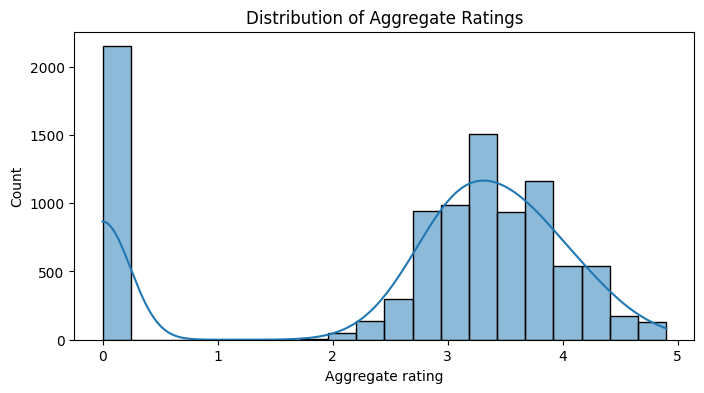

In [66]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.show()

C:\Users\Kirti\AppData\Local\Temp\ipykernel_17172\1478032137.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




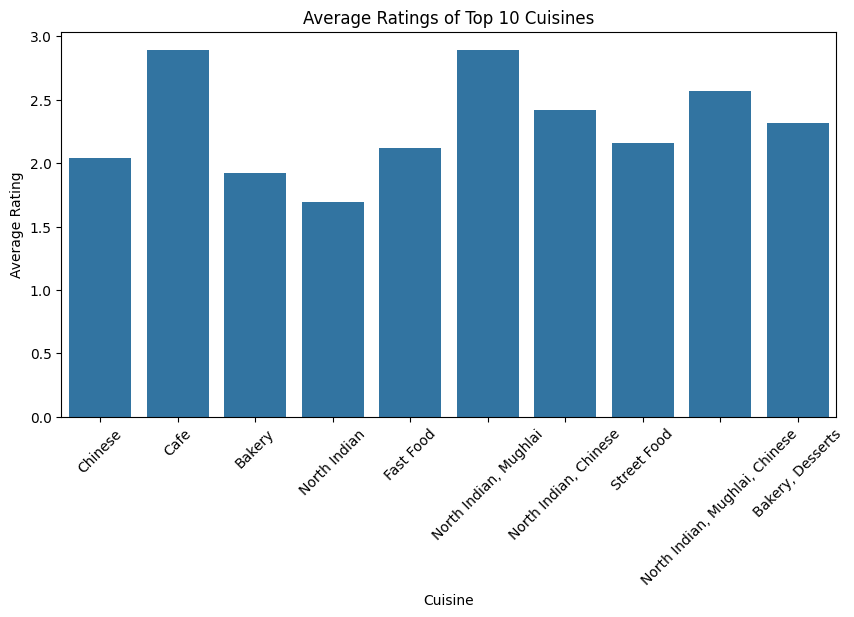

In [67]:
if 'Cuisines' in df.columns:
    top_cuisines = df['Cuisines'].value_counts().head(10).index
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Cuisines', y='Aggregate rating', data=df[df['Cuisines'].isin(top_cuisines)], ci=None, estimator=np.mean)
    plt.title('Average Ratings of Top 10 Cuisines')
    plt.xlabel('Cuisine')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Kirti\AppData\Local\Temp\ipykernel_17172\1613375569.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




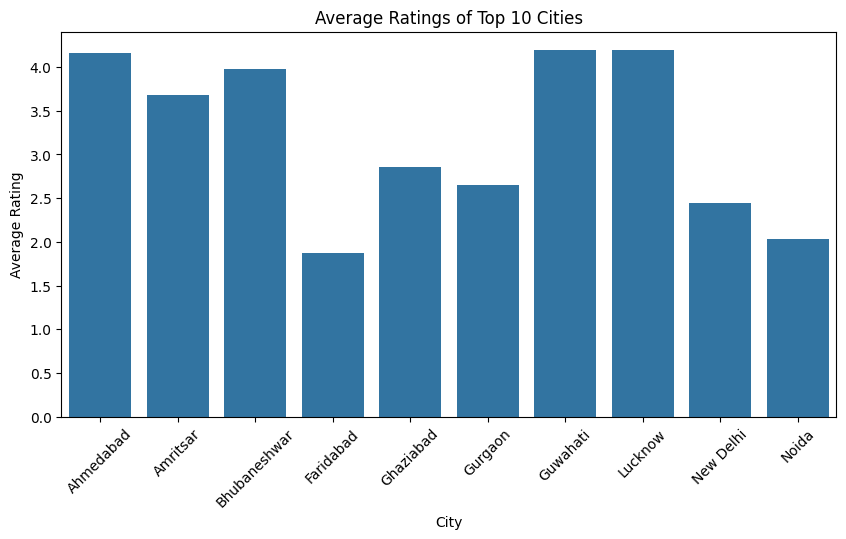

In [68]:
if 'City' in df.columns:
    top_cities = df['City'].value_counts().head(10).index
    plt.figure(figsize=(10, 5))
    sns.barplot(x='City', y='Aggregate rating', data=df[df['City'].isin(top_cities)], ci=None, estimator=np.mean)
    plt.title('Average Ratings of Top 10 Cities')
    plt.xlabel('City')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

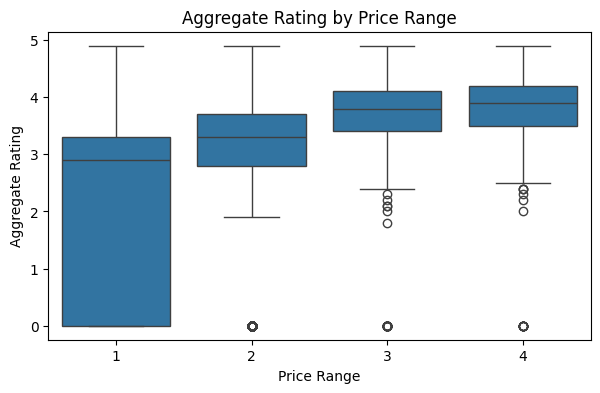

In [69]:
if 'Price range' in df.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Price range', y='Aggregate rating', data=df)
    plt.title('Aggregate Rating by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Aggregate Rating')
    plt.show()